In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 100)

%matplotlib inline

## Data Exploration

In [3]:
# reading dataset

df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:

df.shape

(9240, 37)

In [5]:
# Read data dictionary for reference purpose

df_info = pd.read_excel('Leads Data Dictionary.xlsx', skiprows=2, usecols=[1,2])

df_info.head()

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identif...
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,The origin identifier with which the customer ...
3,Lead Source,"The source of the lead. Includes Google, Organ..."
4,Do Not Email,An indicator variable selected by the customer...


In [6]:
# Analysing the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Function to find the nulls percentage in all columns

def nulls(df):
    print(round(( df.isna().sum()/len(df) * 100 ) , 2))
    
nulls(df)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Function to find the unique values in all categorical columns

def show_uniques(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            print(df[col].value_counts(dropna=False), end='\n\n')
            

In [10]:
show_uniques(df)

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call  

In [11]:
# creating a function to plot counts of categories in categorical columns

def plot_catcols(df):
    for col in df.columns:
        if df[col].dtypes == 'object':
            plt.figure(figsize=[10,5])
            sns.histplot(x=df[col])
            plt.xticks(rotation=90)
            

## Data Cleaning

In [12]:
# Replacing 'Select' in all columns with Nulls because since User did not specify it,
# it's as good as null

df = df.replace(to_replace='Select', value=np.nan)
df['Specialization'].value_counts(dropna=False)


NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [13]:
df['Specialization'].value_counts(dropna=False, normalize=True)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [132]:
# now check the nulls

nulls(df)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Handling Missing Values

##### Few columns are irrelevant for prediction as they have unnecessary or extremely skewed Data.
###### So, we will remove these columns first.


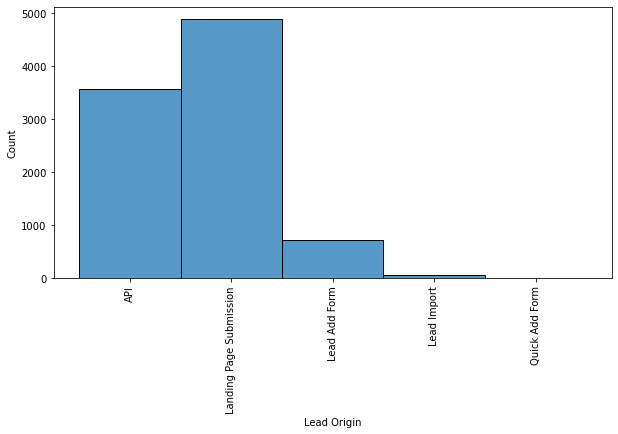

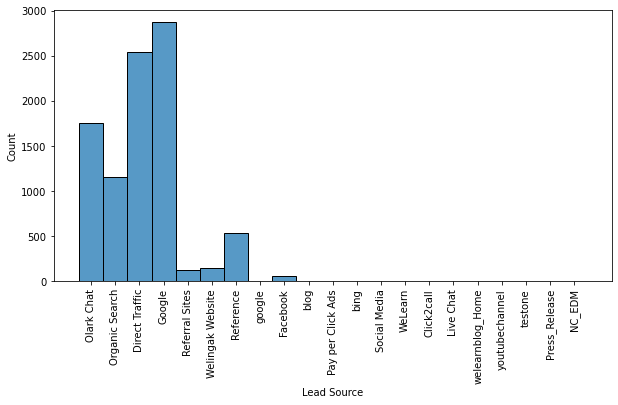

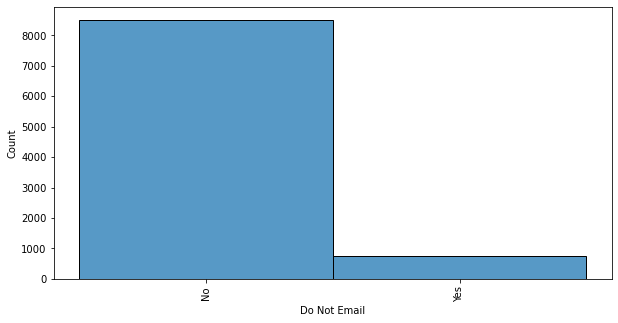

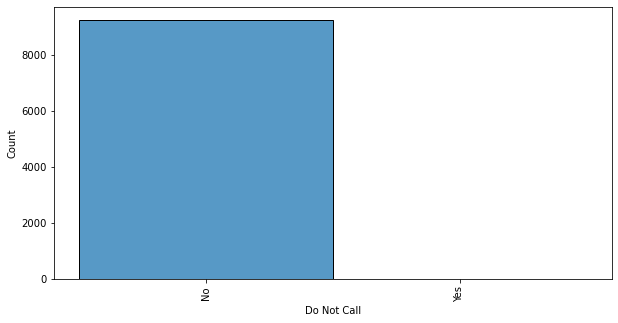

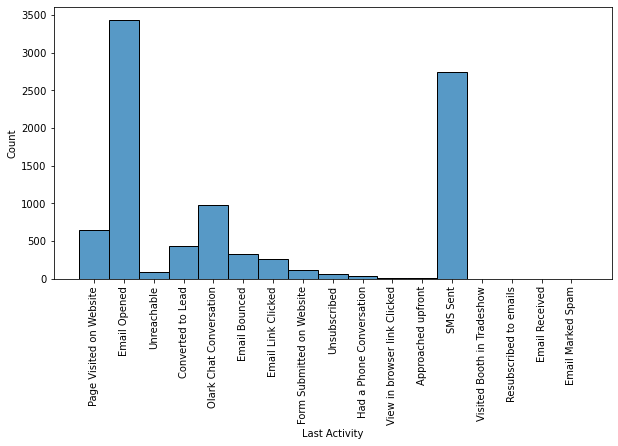

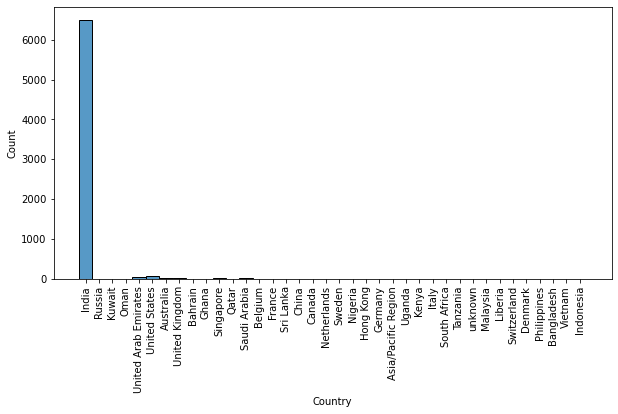

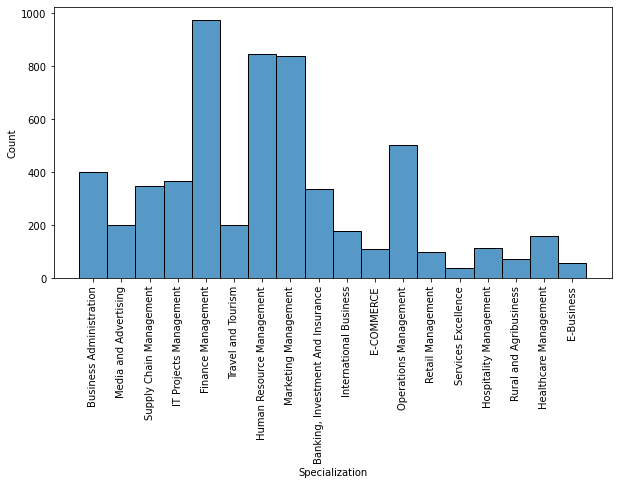

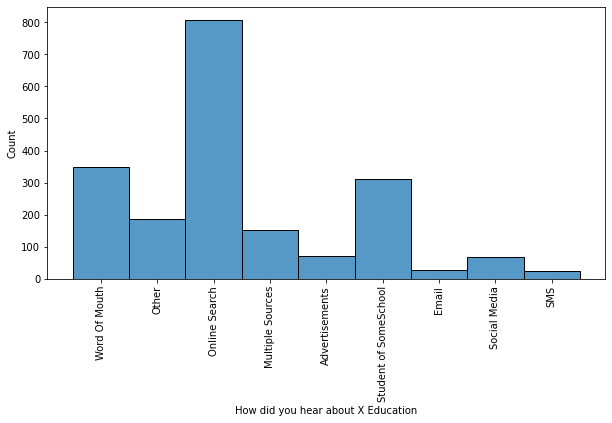

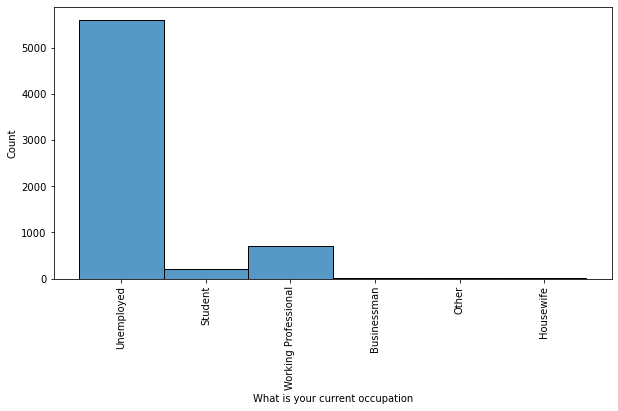

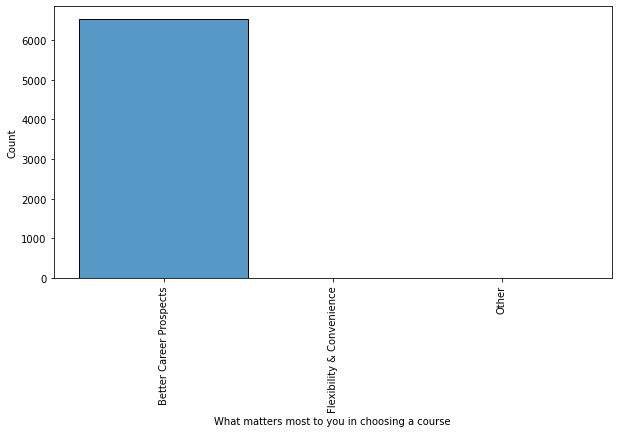

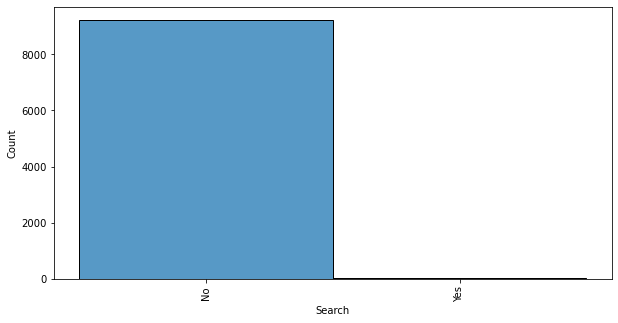

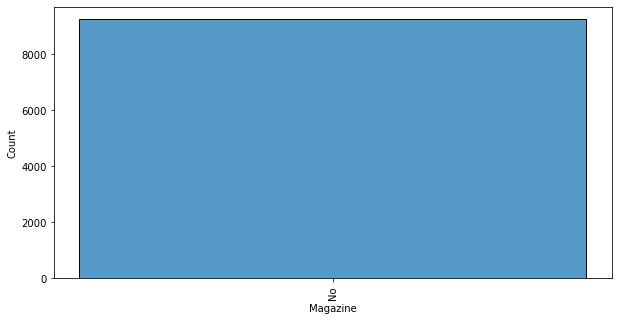

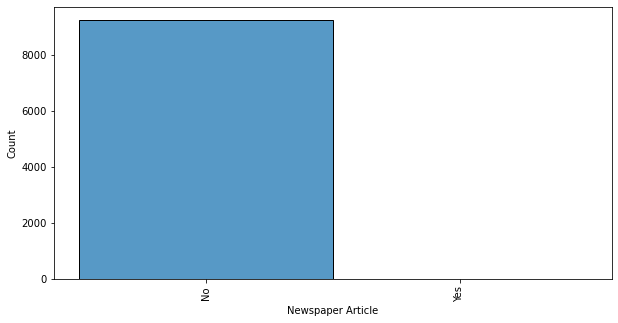

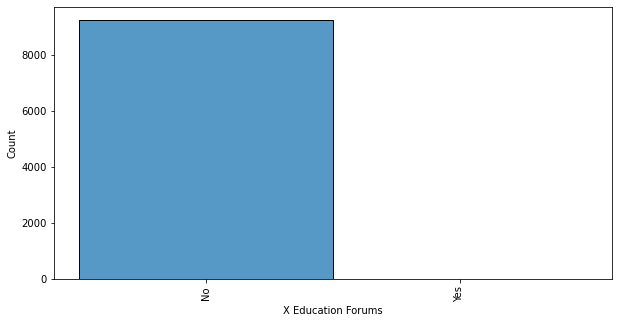

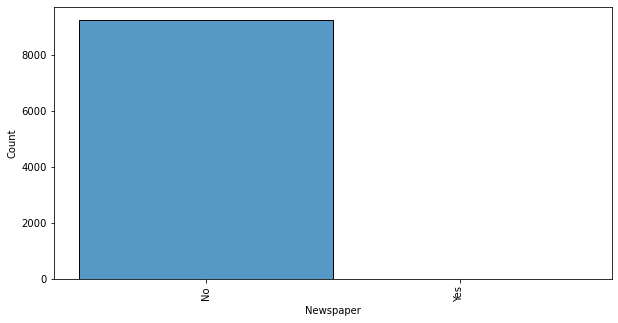

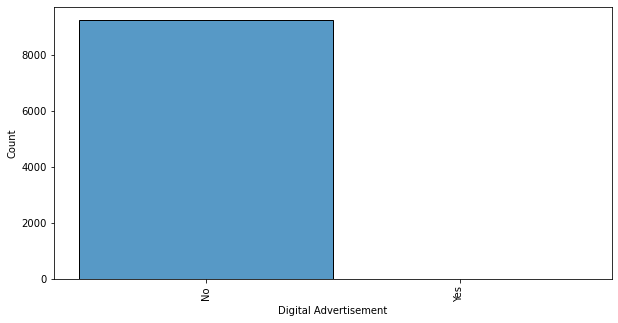

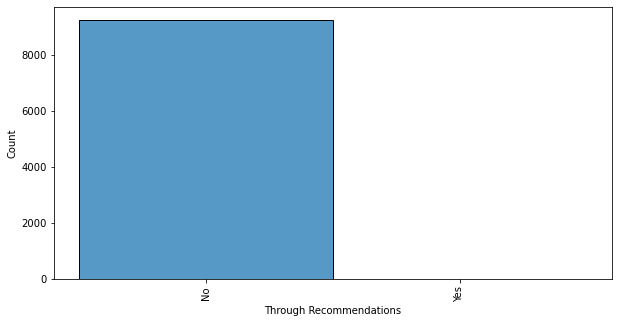

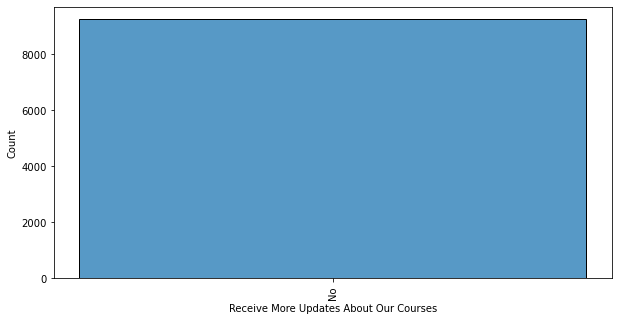

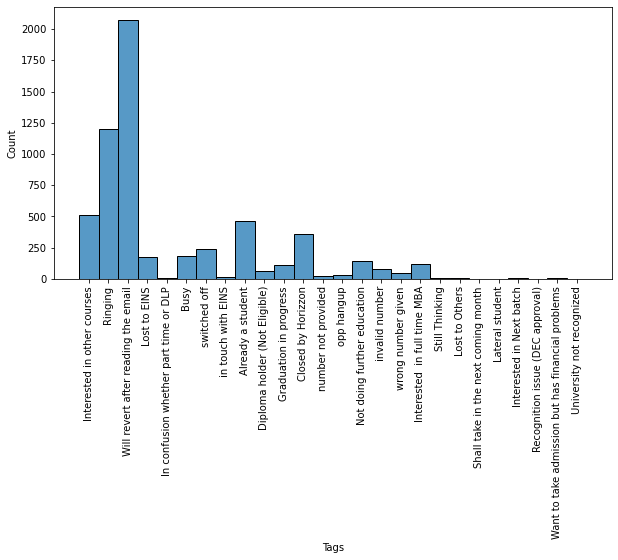

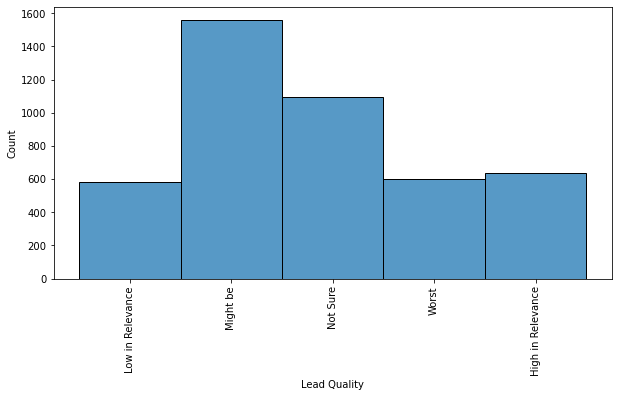

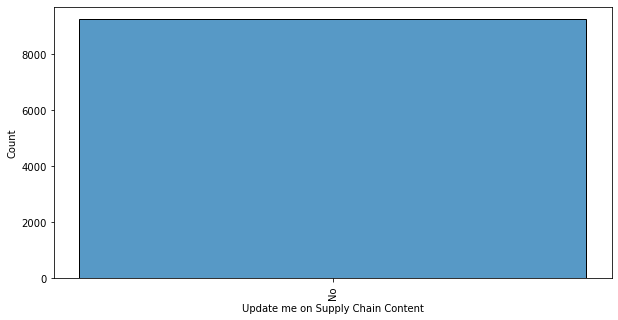

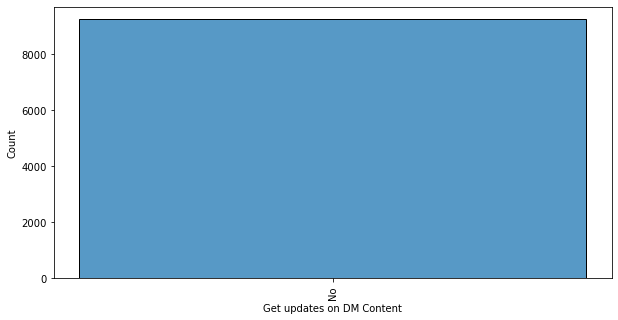

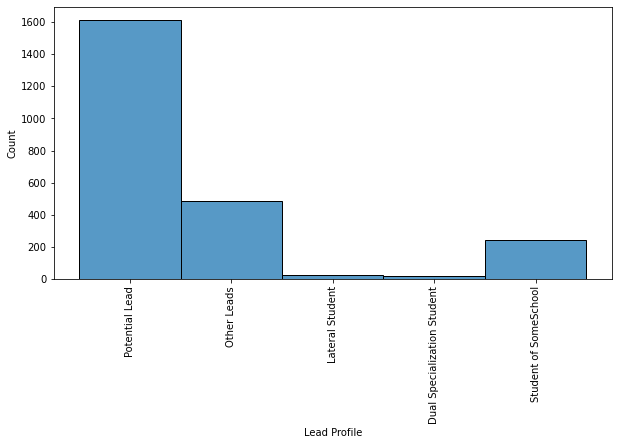

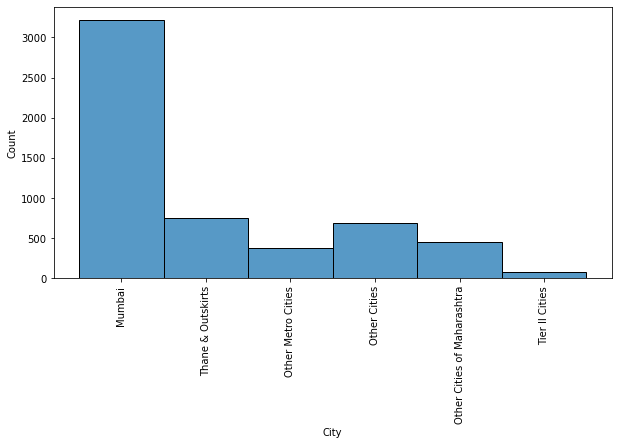

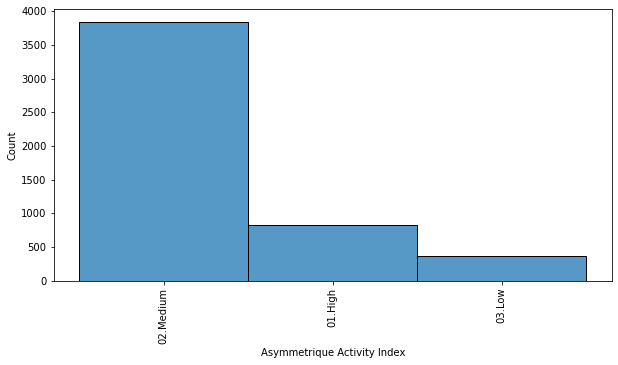

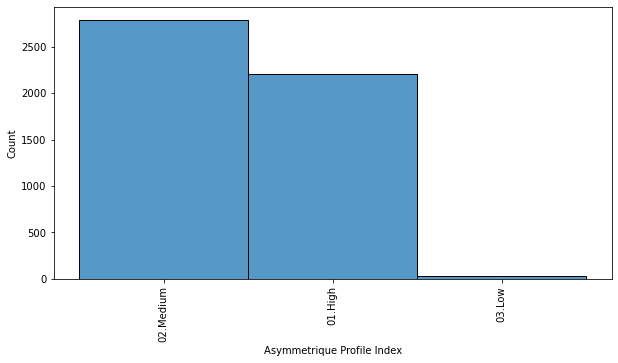

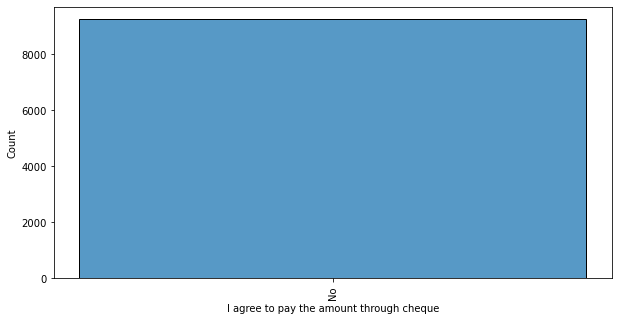

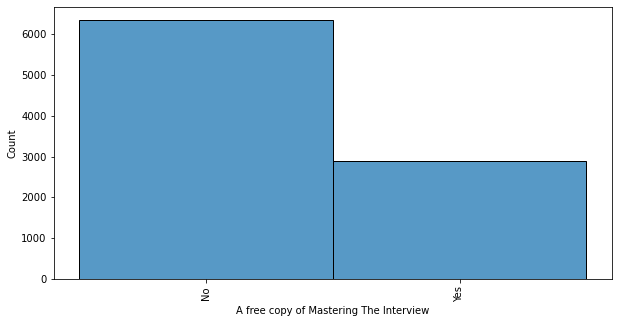

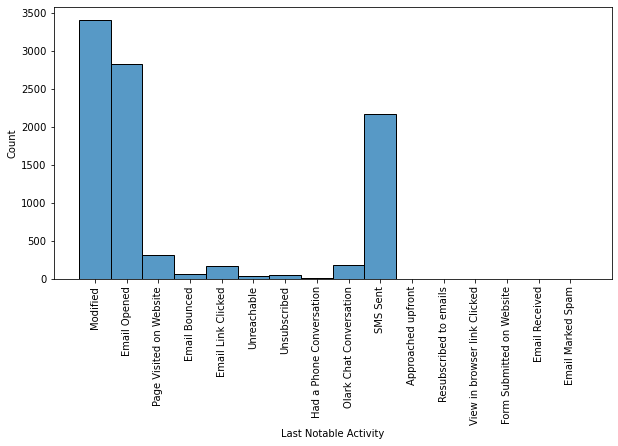

In [133]:
# Remove unique ID columns

df_1 =  df.drop(columns=['Prospect ID','Lead Number'])

plot_catcols(df_1)

In [134]:
# Remove the unnecessary and skewed columns

df_1 = df_1.drop(columns=['Do Not Email', 'Do Not Call', 'Country',
                        'What matters most to you in choosing a course', 'Search',
                        'Magazine', 'Newspaper Article', 'X Education Forums',
                        'Newspaper', 'Digital Advertisement', 'Through Recommendations',
                        'Receive More Updates About Our Courses', 
                        'Update me on Supply Chain Content', 'Get updates on DM Content',
                        'I agree to pay the amount through cheque', 
                       'A free copy of Mastering The Interview'])


In [135]:
nulls(df_1)

Lead Origin                            0.00
Lead Source                            0.39
Converted                              0.00
TotalVisits                            1.48
Total Time Spent on Website            0.00
Page Views Per Visit                   1.48
Last Activity                          1.11
Specialization                        36.58
How did you hear about X Education    78.46
What is your current occupation       29.11
Tags                                  36.29
Lead Quality                          51.59
Lead Profile                          74.19
City                                  39.71
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
Last Notable Activity                  0.00
dtype: float64


In [136]:
# remove columns with more than or equal to 30% null values

d = dict(round(df_1.isna().sum()/len(df_1), 2) * 100) 

cols = [key for key in d.keys() if d[key] >= 30]
print('Removing below columns with >=30% null values :', cols, sep='\n')

df_1 = df_1.drop(columns=cols)

Removing below columns with >=30% null values :
['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [137]:
# check null percentage again

nulls(df_1)

Lead Origin                         0.00
Lead Source                         0.39
Converted                           0.00
TotalVisits                         1.48
Total Time Spent on Website         0.00
Page Views Per Visit                1.48
Last Activity                       1.11
What is your current occupation    29.11
Last Notable Activity               0.00
dtype: float64


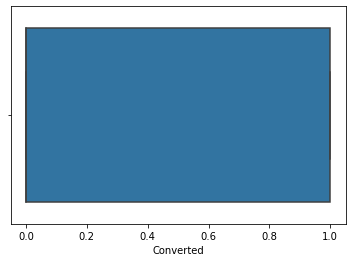

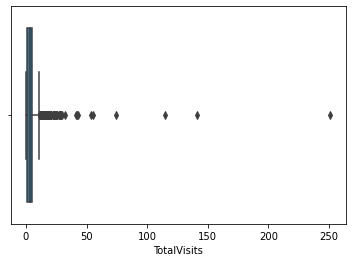

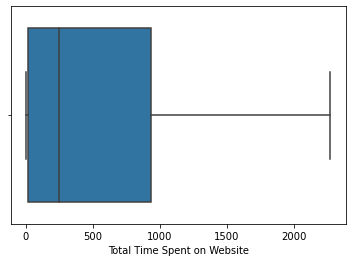

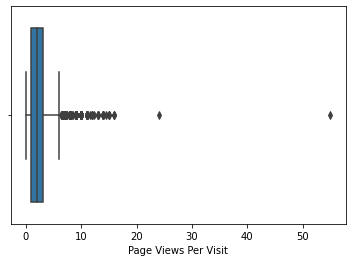

In [138]:
# plotting boxplots for numerical columns 

def plot_numcols(df):
    for col in df.columns:
        if df[col].dtypes in ['int64', 'float64']:
            plt.figure()
            sns.boxplot(x=df[col])
        
plot_numcols(df_1)

###### `TotalVisits`, `Page Views Per Visit` columns are very skewed with lot of outliers

In [139]:

df_1.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [140]:
# Cleaning 'TotalVisits' , 'Page Views Per Visit' , 'Last Activity' and 'Lead Source'
# Since these columns have only around 1% of nulls, we can impute them

# impute 'TotalVisits' with median
df_1['TotalVisits'].fillna(df_1['TotalVisits'].median(), inplace=True)

# impute 'Page Views Per Visit' with median
df_1['Page Views Per Visit'].fillna(df_1['Page Views Per Visit'].median(), inplace=True)

# impute 'Last Activity' with mode
df_1['Last Activity'].fillna(df_1['Last Activity'].mode()[0], inplace=True)

# impute 'Lead Source' with mode
df_1['Lead Source'].fillna(df_1['Lead Source'].mode()[0], inplace=True)

nulls(df_1)

Lead Origin                         0.00
Lead Source                         0.00
Converted                           0.00
TotalVisits                         0.00
Total Time Spent on Website         0.00
Page Views Per Visit                0.00
Last Activity                       0.00
What is your current occupation    29.11
Last Notable Activity               0.00
dtype: float64


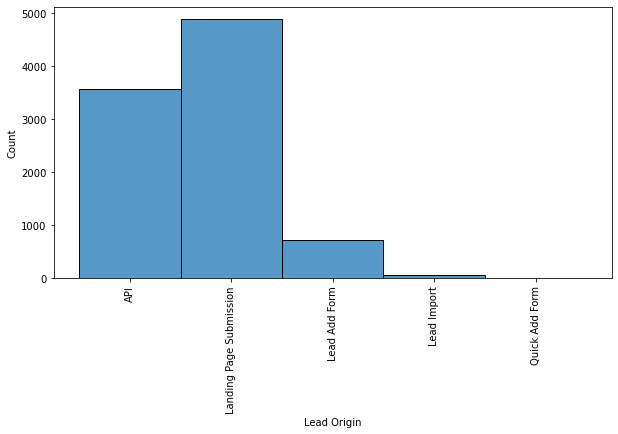

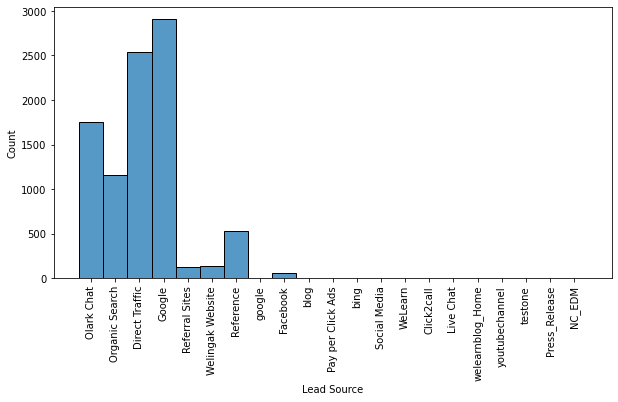

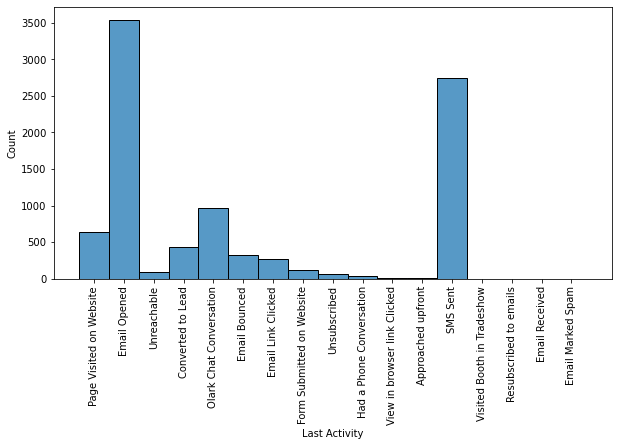

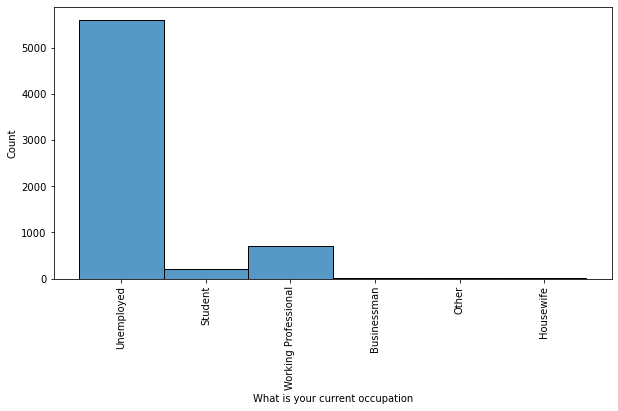

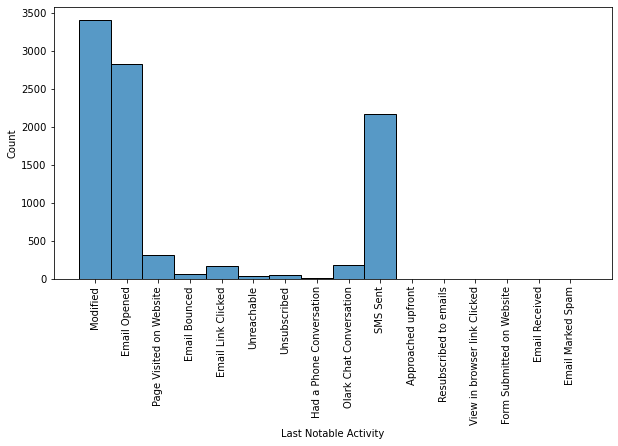

In [141]:
# Imputing missing values in categorical columns

plot_catcols(df_1)

In [142]:
# Cleaning 'What is your current occupation' column

df_1['What is your current occupation'].fillna('Other', inplace = True)

df_1['What is your current occupation'].replace(['Businessman','Housewife'], 'Other', inplace=True)

df_1['What is your current occupation'].value_counts()

Unemployed              5600
Other                   2724
Working Professional     706
Student                  210
Name: What is your current occupation, dtype: int64

In [143]:
for col in df_1.columns:
    if df_1[col].dtype == 'object':
        print(df_1[col].value_counts(dropna=False, normalize=True), end='\n\n')

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

Google               0.314286
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

Email Opened                    0.383117
SMS Sent                        0.297078
Olark Chat Conversation         0.1053

In [144]:
# Cleaning the columns to group the categories with very low counts(below 1%) into one category

d1 = dict(df_1['Last Activity'].value_counts(normalize=True))
keys_to_replace = [key for key in d1.keys() if d1[key] <= 0.01]
df_1['Last Activity'].replace(keys_to_replace, 'Others', inplace=True)


df_1['Lead Source'].replace('google', 'Google', inplace=True)
d2 = dict(df_1['Lead Source'].value_counts(normalize=True))
keys_to_replace = [key for key in d2.keys() if d2[key] <= 0.01]
df_1['Lead Source'].replace(keys_to_replace, 'Other sites & Social media', inplace=True)

d3 = dict(df_1['Last Notable Activity'].value_counts(normalize=True))
keys_to_replace = [key for key in d3.keys() if d3[key] <= 0.01]
df_1['Last Notable Activity'].replace(keys_to_replace, 'Others', inplace=True)

show_uniques(df_1)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Google                        2909
Direct Traffic                2543
Olark Chat                    1755
Organic Search                1154
Reference                      534
Welingak Website               142
Referral Sites                 125
Other sites & Social media      78
Name: Lead Source, dtype: int64

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Others                        112
Unreachable                    93
Name: Last Activity, dtype: int64

Unemployed              5600
Other                   2724
Working Professional     706
Student                  210
Nam

In [145]:
# now all null values are treated 

nulls(df_1)

Lead Origin                        0.0
Lead Source                        0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
Last Activity                      0.0
What is your current occupation    0.0
Last Notable Activity              0.0
dtype: float64


#### Handling Outliers

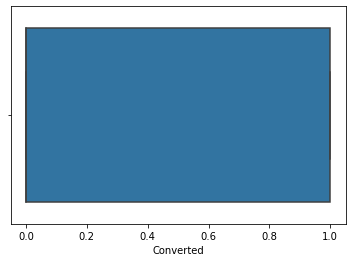

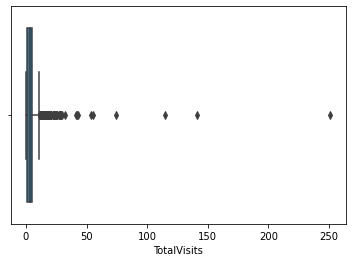

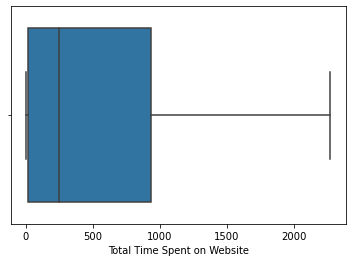

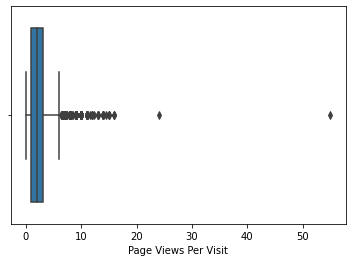

In [146]:
# checking boxplot after treating outliers

plot_numcols(df_1)

#### We can see outliers are present in 'TotalVisits', 'Page Views Per Visit' columns and they are highly skewed. 

##### We will remove these outliers by Capping them.

In [147]:

df_1.loc[df_1['TotalVisits'] >= 15, 'TotalVisits'] = 15
df_1.loc[df_1['Page Views Per Visit'] > 10, 'Page Views Per Visit'] = 10

In [148]:
df_1.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.304113,487.698268,2.337167
std,0.486714,3.134318,548.021466,2.000642
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,15.000000,2272.000000,10.000000


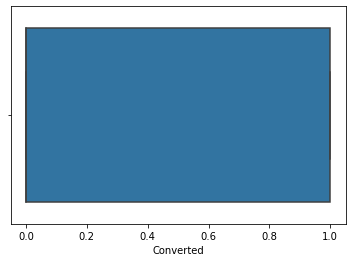

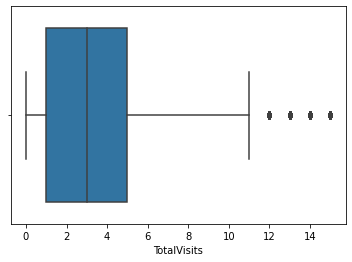

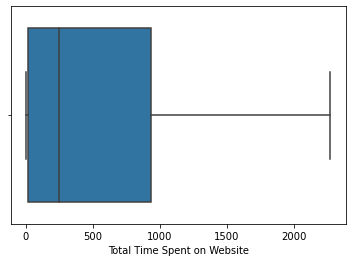

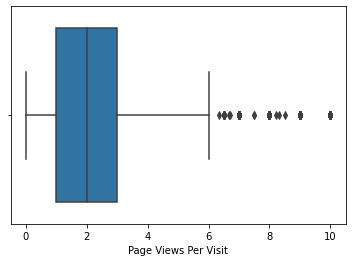

In [149]:
# checking boxplot after treating outliers

plot_numcols(df_1)

#### Now, the outliers are also cleaned.

In [150]:

df_1.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,Modified


In [151]:
# Rename columns for ease

df_1.rename(columns={'What is your current occupation': 'Current Occupation',
                    'Total Time Spent on Website' : 'Time on Website'},
           inplace=True)


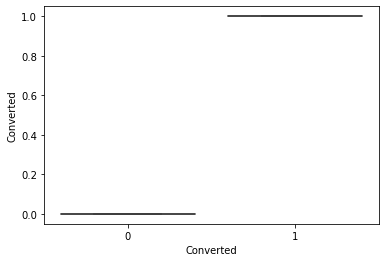

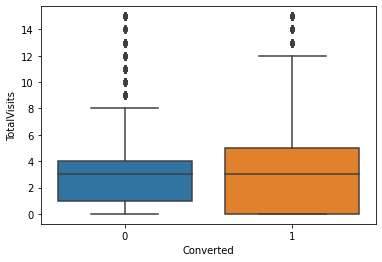

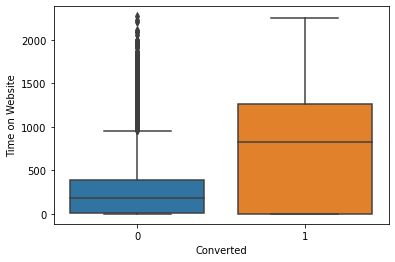

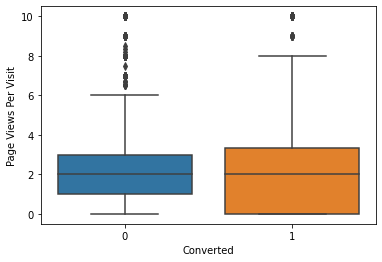

In [152]:
# plotting boxplots for numerical columns as per Converted values as the hue

def boxplot_Converted(df):
    for col in df.columns:
        if df[col].dtypes in ['int64', 'float64']:
            plt.figure()
            sns.boxplot( x=df['Converted'], y=df[col])
        
boxplot_Converted(df_1)

#### Observation : Customers who converted mostly spent more time on website

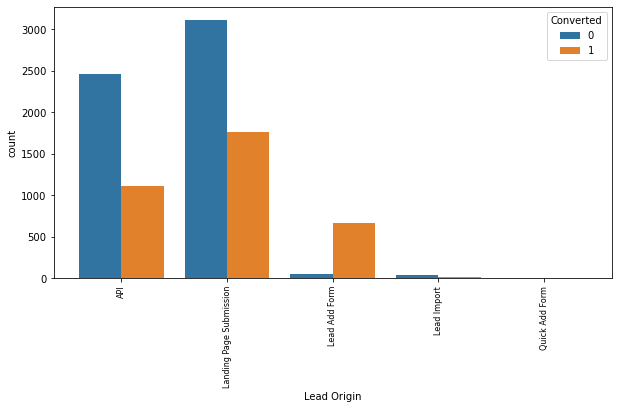

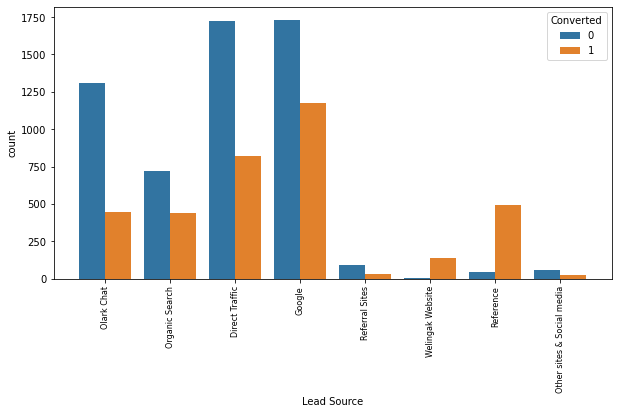

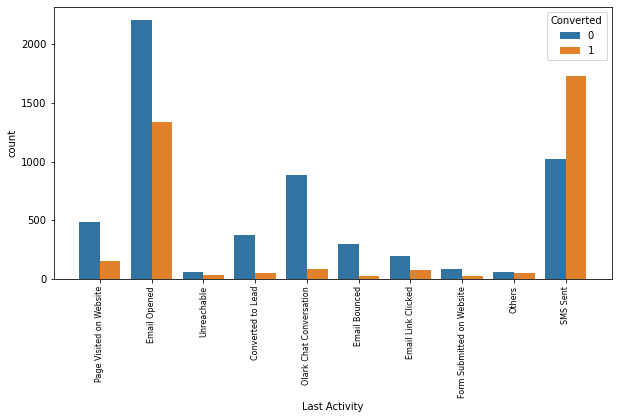

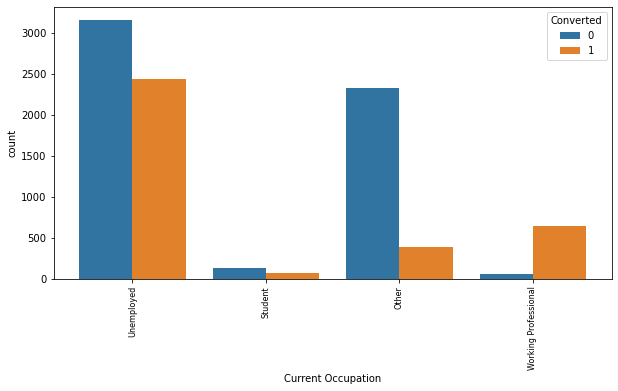

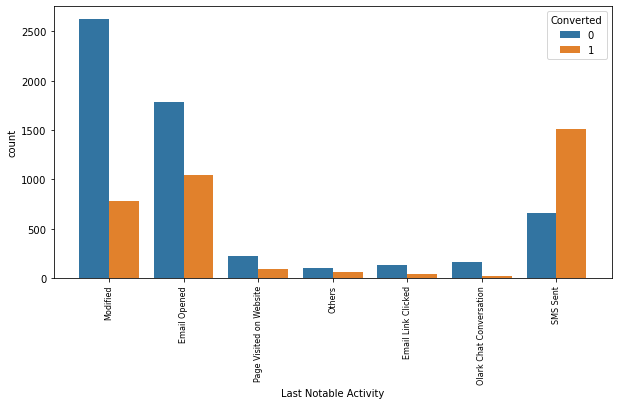

In [153]:
# plot countplot of categorical columns with 'Converted' values as the hue.

def countplot_converted(df):
    for col in df.columns:
        if df[col].dtypes == 'object':       
            plt.figure(figsize=[10,5])
            sns.countplot(x = df[col], hue = df['Converted'])
            plt.xticks(rotation=90, fontsize=8)
            plt.plot()
            

countplot_converted(df_1)

#### Observations:

Higher category-wise conversion rates were for:
1. Lead origin as Lead Add form
2. Lead source as Reference
3. Last activity as SMS sent 
4. Current occupation as Working professional


In [154]:

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Lead Origin            9240 non-null   object 
 1   Lead Source            9240 non-null   object 
 2   Converted              9240 non-null   int64  
 3   TotalVisits            9240 non-null   float64
 4   Time on Website        9240 non-null   int64  
 5   Page Views Per Visit   9240 non-null   float64
 6   Last Activity          9240 non-null   object 
 7   Current Occupation     9240 non-null   object 
 8   Last Notable Activity  9240 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 649.8+ KB


In [155]:
# convert categorical columns to dummies

dummy_cols = ['Lead Origin', 'Lead Source', 'Last Activity','Current Occupation', 'Last Notable Activity']

dummy = pd.get_dummies(df_1[dummy_cols], 
                      drop_first=True)

dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other sites & Social media,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [156]:
# concat dummies with dataset

df_2 = pd.concat([df_1, dummy], axis=1)
df_2.drop(columns=dummy_cols, inplace=True)
df_2.head()

,Converted,TotalVisits,Time on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other sites & Social media,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [157]:
df_2.shape

(9240, 33)

<AxesSubplot:>

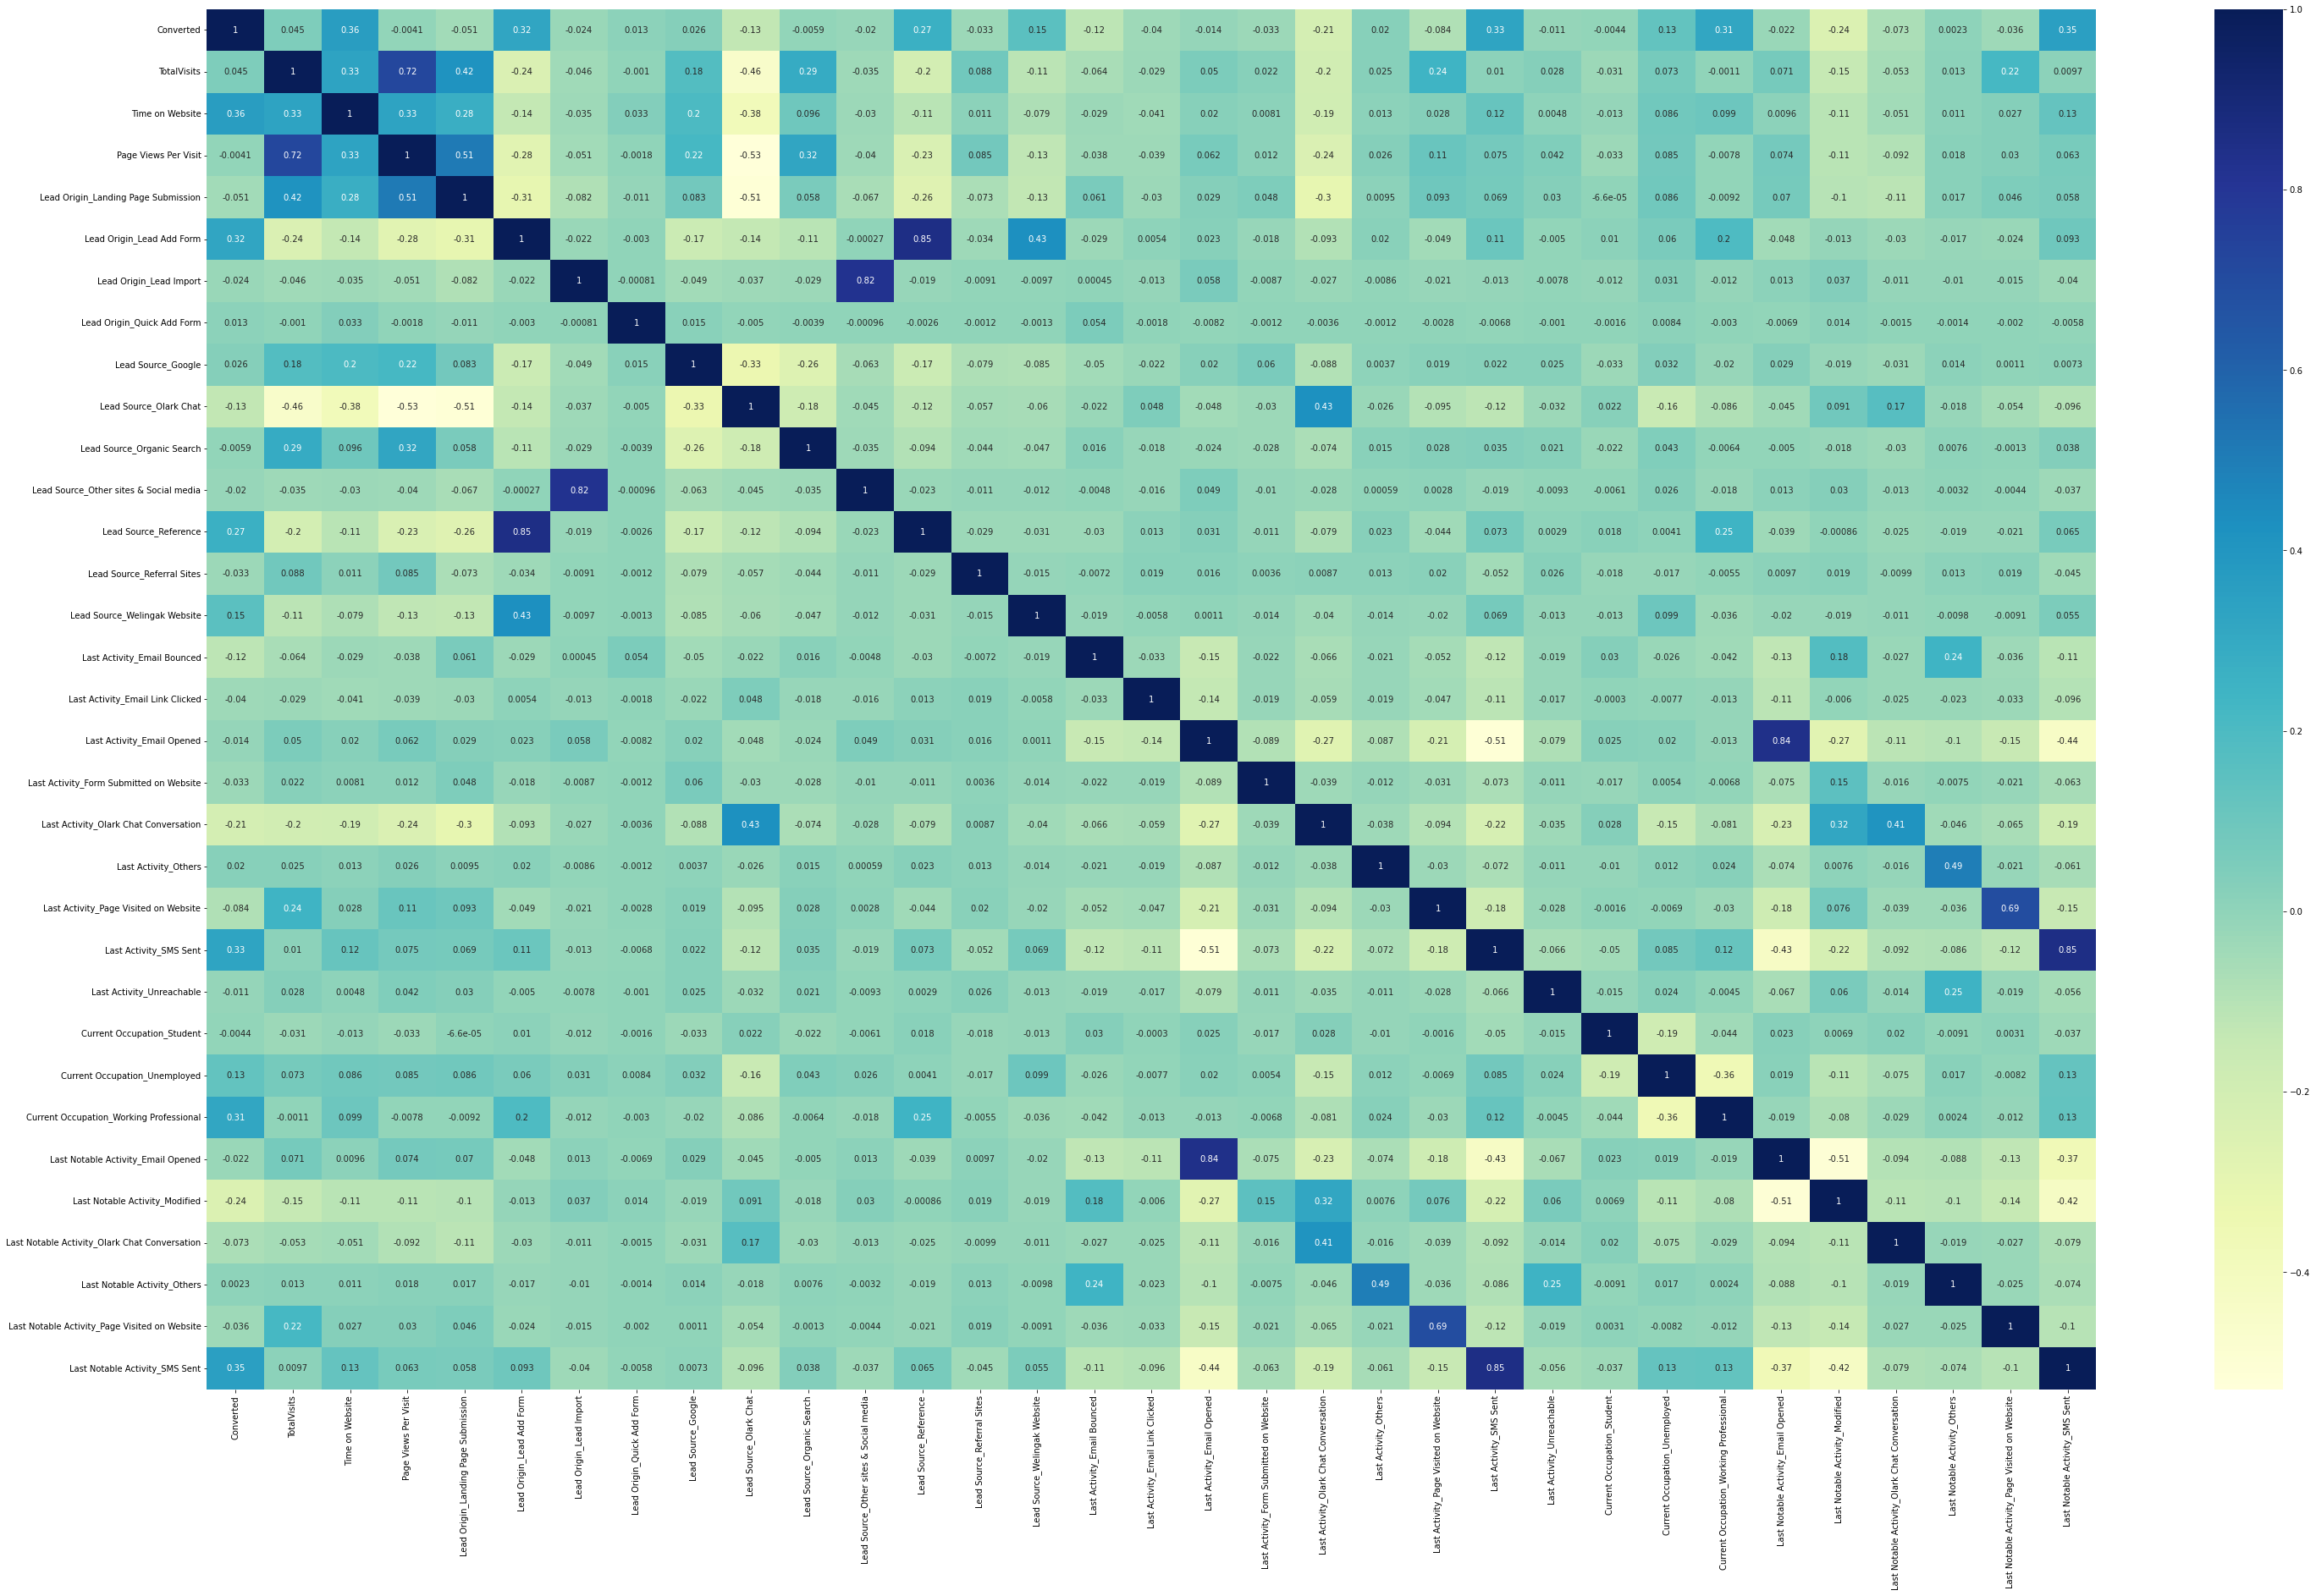

In [158]:
# visualizing the correlation

plt.figure(figsize=[50,30])
sns.heatmap(df_2.corr(), cmap='YlGnBu', annot=True)

In [159]:
# Divide data into X and y

y = df_2.pop('Converted')
X = df_2

print(X.shape,y.shape)

(9240, 32) (9240,)


In [160]:
# checking percentage of conversion in the data

(sum(y)/len(y))*100

38.53896103896104

##### We have around 38.5% conversion rate in the data. 

## Data Preparation 

In [161]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score, recall_score, roc_curve, auc
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [162]:
# Splitting into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

print(X_train.shape, X_test.shape)

(6468, 32) (2772, 32)


In [163]:
# Scaling the data for Logistic regression model

scaler = MinMaxScaler()
cols = ['TotalVisits', 'Time on Website' , 'Page Views Per Visit']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_train[cols]

,TotalVisits,Time on Website,Page Views Per Visit
4715,0.000000,0.000000,0.000
7132,0.133333,0.549296,0.100
8954,0.266667,0.170335,0.133
5283,1.000000,0.532130,1.000
3003,0.200000,0.595951,0.300
...,...,...,...
5734,0.200000,0.057218,0.300
5191,0.000000,0.000000,0.000
5390,0.000000,0.000000,0.000
860,0.200000,0.078785,0.300


## Model Building 

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [165]:
# initialize logistic regression model
logreg = LogisticRegression()

# running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select= 15)

# fit rfe to find top 15 features
rfe = rfe.fit(X_train, y_train)

In [166]:
# Viewing all the features, if they are selected by rfe or not, and their ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Time on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 18),
 ('Lead Origin_Quick Add Form', False, 3),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Other sites & Social media', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 17),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 13),
 ('Last Activity_Olark Chat Conversation', False, 2),
 ('Last Activity_Others', False, 7),
 ('Last Activity_Page Visited on Website', False, 15),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 9),
 ('Current Occu

In [167]:
# columns used in the prediction

col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Time on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Current Occupation_Student',
       'Current Occupation_Unemployed',
       'Current Occupation_Working Professional',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [168]:

X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res1 = logm.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2674.1
Date:                Fri, 16 Jun 2023   Deviance:                       5348.3
Time:                        11:35:30   Pearson chi2:                 6.56e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -3.9408      0.139    -28.432      0.000      -4.212      -3.669
TotalVisits                                 1.6237      0.225      7.203      0.000       1.182       2.066
Time on Website                             4.4509      0.165     27.044      0.000       4.128       4.774
Page Views Per Visit                       -1.5805      0.265     -5.970      0.000      -2.099      -1.062
Lead Origin_Lead Add Form                   2.6553      0.540      4.920      0.000       1.597       3.713
Lead Source_Olark Chat                      1.0539      0.119      8.835      0.000       0.820       1.288
Lead Source_Reference                       0.7803      0.571      1.366      0.172      -0.339       1.900
Lead Source_Welingak Website               23.1251   1.38e+04      0.002      0.999    -2.7e+04     2.7e+04
Last Activity_Email Bounced                -1.7462      0.334     -5.231      0.000      -2.400      -1.092
Last Activity_Email Opened                  0.9094      0.093      9.810      0.000       0.728       1.091
Last Activity_SMS Sent                      1.2032      0.155      7.763      0.000       0.899       1.507
Current Occupation_Student                  1.2520      0.232      5.406      0.000       0.798       1.706
Current Occupation_Unemployed               1.1111      0.086     12.898      0.000       0.942       1.280
Current Occupation_Working Professional     3.4479      0.193     17.842      0.000       3.069       3.827
Last Notable Activity_Others                2.0336      0.270      7.522      0.000       1.504       2.563
Last Notable Activity_SMS Sent              1.0737      0.149      7.183      0.000       0.781       1.367
===========================================================================================================
"""

In [169]:
# creating a function to find the vif 

from statsmodels.stats.outliers_influence import variance_inflation_factor


def findVIF(x):   
    # Creating vif dataframe
    vif=pd.DataFrame()
    
    # adding same features as the X_train dataset 
    vif['Features']= x.columns  

    # Calculating VIFs
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    # Rounding the vif values
    vif['VIF']=round(vif['VIF'],2)

    # Sorting the vif values
    vif=vif.sort_values(by='VIF',ascending=False)
    
    return vif



findVIF(X_train[col])

,Features,VIF
3,Lead Origin_Lead Add Form,16.13
5,Lead Source_Reference,13.30
9,Last Activity_SMS Sent,5.46
2,Page Views Per Visit,5.31
14,Last Notable Activity_SMS Sent,4.77
0,TotalVisits,4.36
6,Lead Source_Welingak Website,3.61
11,Current Occupation_Unemployed,2.82
1,Time on Website,2.16
8,Last Activity_Email Opened,2.15


#### VIF values are very high for Lead Origin_Lead Add Form
#### Removing `Lead Origin_Lead Add Form` as it has the highest VIF 

In [170]:

col = col.drop(['Lead Origin_Lead Add Form'], 1)
X_train_sm  = sm.add_constant(X_train[col])

logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res2 = logm.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2690.9
Date:                Fri, 16 Jun 2023   Deviance:                       5381.8
Time:                        11:35:30   Pearson chi2:                 6.51e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -3.8630      0.137    -28.248      0.000      -4.131      -3.595
TotalVisits                                 1.5755      0.225      7.008      0.000       1.135       2.016
Time on Website                             4.3816      0.163     26.838      0.000       4.062       4.702
Page Views Per Visit                       -1.7263      0.264     -6.544      0.000      -2.243      -1.209
Lead Source_Olark Chat                      0.9666      0.117      8.239      0.000       0.737       1.197
Lead Source_Reference                       3.3417      0.221     15.150      0.000       2.909       3.774
Lead Source_Welingak Website               25.6822   1.38e+04      0.002      0.999    -2.7e+04     2.7e+04
Last Activity_Email Bounced                -1.6376      0.331     -4.949      0.000      -2.286      -0.989
Last Activity_Email Opened                  0.9125      0.092      9.883      0.000       0.732       1.093
Last Activity_SMS Sent                      1.2093      0.154      7.829      0.000       0.907       1.512
Current Occupation_Student                  1.2734      0.230      5.545      0.000       0.823       1.724
Current Occupation_Unemployed               1.1275      0.086     13.120      0.000       0.959       1.296
Current Occupation_Working Professional     3.4550      0.193     17.915      0.000       3.077       3.833
Last Notable Activity_Others                2.0155      0.269      7.504      0.000       1.489       2.542
Last Notable Activity_SMS Sent              1.0944      0.149      7.345      0.000       0.802       1.386
===========================================================================================================
"""

In [171]:

findVIF(X_train[col])

,Features,VIF
8,Last Activity_SMS Sent,5.46
2,Page Views Per Visit,5.29
13,Last Notable Activity_SMS Sent,4.77
0,TotalVisits,4.36
10,Current Occupation_Unemployed,2.80
1,Time on Website,2.16
7,Last Activity_Email Opened,2.14
11,Current Occupation_Working Professional,1.40
4,Lead Source_Reference,1.29
3,Lead Source_Olark Chat,1.28


#### Dropping `Lead Source_Welingak Website` as it has high p-value

In [172]:
col = col.drop(['Lead Source_Welingak Website'], 1)
X_train_sm  = sm.add_constant(X_train[col])

logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res3 = logm.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2785.2
Date:                Fri, 16 Jun 2023   Deviance:                       5570.4
Time:                        11:35:30   Pearson chi2:                 6.51e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -3.5841      0.131    -27.304      0.000      -3.841      -3.327
TotalVisits                                 1.3929      0.222      6.271      0.000       0.958       1.828
Time on Website                             4.1305      0.159     25.937      0.000       3.818       4.443
Page Views Per Visit                       -2.2608      0.262     -8.641      0.000      -2.774      -1.748
Lead Source_Olark Chat                      0.6365      0.112      5.680      0.000       0.417       0.856
Lead Source_Reference                       3.0067      0.218     13.799      0.000       2.580       3.434
Last Activity_Email Bounced                -1.6682      0.325     -5.134      0.000      -2.305      -1.031
Last Activity_Email Opened                  0.9495      0.091     10.465      0.000       0.772       1.127
Last Activity_SMS Sent                      1.3284      0.149      8.887      0.000       1.035       1.621
Current Occupation_Student                  1.2746      0.227      5.604      0.000       0.829       1.720
Current Occupation_Unemployed               1.2003      0.085     14.104      0.000       1.034       1.367
Current Occupation_Working Professional     3.4417      0.192     17.923      0.000       3.065       3.818
Last Notable Activity_Others                1.9868      0.266      7.471      0.000       1.466       2.508
Last Notable Activity_SMS Sent              1.0123      0.144      7.042      0.000       0.731       1.294
===========================================================================================================
"""

In [173]:

findVIF(X_train[col])

,Features,VIF
7,Last Activity_SMS Sent,5.41
2,Page Views Per Visit,5.24
12,Last Notable Activity_SMS Sent,4.77
0,TotalVisits,4.36
9,Current Occupation_Unemployed,2.74
1,Time on Website,2.15
6,Last Activity_Email Opened,2.12
10,Current Occupation_Working Professional,1.40
4,Lead Source_Reference,1.28
3,Lead Source_Olark Chat,1.27


#### Dropping Last Activity_SMS Sent as it has high VIF

In [174]:
col = col.drop(['Last Activity_SMS Sent'], 1)
X_train_sm  = sm.add_constant(X_train[col])

logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res4 = logm.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2823.2
Date:                Fri, 16 Jun 2023   Deviance:                       5646.3
Time:                        11:35:30   Pearson chi2:                 6.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -3.2364      0.121    -26.690      0.000      -3.474      -2.999
TotalVisits                                 1.2171      0.218      5.579      0.000       0.789       1.645
Time on Website                             4.1205      0.158     26.048      0.000       3.810       4.431
Page Views Per Visit                       -2.0850      0.260     -8.024      0.000      -2.594      -1.576
Lead Source_Olark Chat                      0.5704      0.111      5.150      0.000       0.353       0.787
Lead Source_Reference                       3.0788      0.217     14.166      0.000       2.653       3.505
Last Activity_Email Bounced                -1.8362      0.319     -5.753      0.000      -2.462      -1.211
Last Activity_Email Opened                  0.6541      0.081      8.058      0.000       0.495       0.813
Current Occupation_Student                  1.1638      0.224      5.202      0.000       0.725       1.602
Current Occupation_Unemployed               1.1509      0.084     13.675      0.000       0.986       1.316
Current Occupation_Working Professional     3.3893      0.190     17.848      0.000       3.017       3.762
Last Notable Activity_Others                1.7464      0.263      6.641      0.000       1.231       2.262
Last Notable Activity_SMS Sent              2.0395      0.092     22.140      0.000       1.859       2.220
===========================================================================================================
"""

In [175]:
findVIF(X_train[col])

,Features,VIF
2,Page Views Per Visit,5.08
0,TotalVisits,4.36
8,Current Occupation_Unemployed,2.72
1,Time on Website,2.13
6,Last Activity_Email Opened,1.98
11,Last Notable Activity_SMS Sent,1.75
9,Current Occupation_Working Professional,1.40
4,Lead Source_Reference,1.27
3,Lead Source_Olark Chat,1.25
5,Last Activity_Email Bounced,1.13


#### Dropping Page Views Per Visit as it has high VIF

In [176]:

col = col.drop(['Page Views Per Visit'], 1)
X_train_sm  = sm.add_constant(X_train[col])

logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res5 = logm.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2856.5
Date:                Fri, 16 Jun 2023   Deviance:                       5713.0
Time:                        11:35:30   Pearson chi2:                 6.61e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -3.4948      0.117    -29.779      0.000      -3.725      -3.265
TotalVisits                                 0.2110      0.181      1.163      0.245      -0.145       0.567
Time on Website                             4.0452      0.157     25.817      0.000       3.738       4.352
Lead Source_Olark Chat                      0.8722      0.105      8.325      0.000       0.667       1.078
Lead Source_Reference                       3.3581      0.215     15.653      0.000       2.938       3.779
Last Activity_Email Bounced                -1.7839      0.316     -5.638      0.000      -2.404      -1.164
Last Activity_Email Opened                  0.5938      0.080      7.410      0.000       0.437       0.751
Current Occupation_Student                  1.1486      0.224      5.135      0.000       0.710       1.587
Current Occupation_Unemployed               1.1460      0.084     13.719      0.000       0.982       1.310
Current Occupation_Working Professional     3.3497      0.188     17.797      0.000       2.981       3.719
Last Notable Activity_Others                1.6558      0.262      6.322      0.000       1.142       2.169
Last Notable Activity_SMS Sent              1.9421      0.090     21.512      0.000       1.765       2.119
===========================================================================================================
"""

In [177]:
findVIF(X_train[col])

,Features,VIF
7,Current Occupation_Unemployed,2.65
0,TotalVisits,2.26
1,Time on Website,2.10
5,Last Activity_Email Opened,1.89
10,Last Notable Activity_SMS Sent,1.69
8,Current Occupation_Working Professional,1.39
3,Lead Source_Reference,1.24
2,Lead Source_Olark Chat,1.21
4,Last Activity_Email Bounced,1.12
9,Last Notable Activity_Others,1.11


#### Now all p-values are below 0.05 and all VIF values are below 5. Our final model is ready

In [178]:
# Getting the predicted values on the train set

y_train_pred = res5.predict(X_train_sm)
y_train_pred.shape

(6468,)

## Plotting the ROC Curve

In [179]:
from sklearn import metrics

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None


In [180]:

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_prob,ID
4715,0,0.116213,4715
7132,1,0.621323,7132
8954,0,0.583857,8954
5283,0,0.503695,5283
3003,0,0.260792,3003


In [181]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

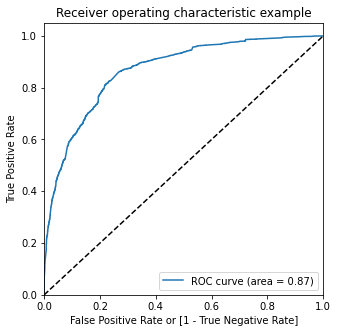

In [182]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob,)

#### We have obtained a very impressive ROC curve as it is very close to the upper left corner of the graph, and the AUC = 87% is pretty good. 

## Finding Optimal Cutoff Point

Probability cutoff where we get balanced sensitivity and specificity

In [183]:
from sklearn.metrics import confusion_matrix


In [184]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Converted,Converted_prob,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4715,0,0.116213,4715,1,1,0,0,0,0,0,0,0,0
7132,1,0.621323,7132,1,1,1,1,1,1,1,0,0,0
8954,0,0.583857,8954,1,1,1,1,1,1,0,0,0,0
5283,0,0.503695,5283,1,1,1,1,1,1,0,0,0,0
3003,0,0.260792,3003,1,1,1,0,0,0,0,0,0,0


In [185]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i , accuracy, sensi, speci]
    
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.572356  0.976248  0.320532
0.2   0.2  0.733302  0.903784  0.627008
0.3   0.3  0.789579  0.824879  0.767570
0.4   0.4  0.782931  0.745169  0.806476
0.5   0.5  0.786178  0.667472  0.860191
0.6   0.6  0.785714  0.580918  0.913404
0.7   0.7  0.761750  0.456924  0.951807
0.8   0.8  0.739177  0.367150  0.971135
0.9   0.9  0.697124  0.227858  0.989709


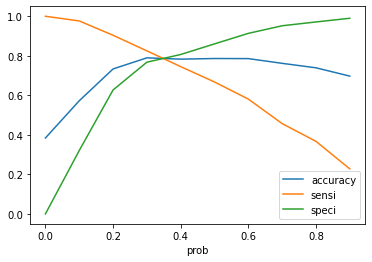

In [186]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Since in our case we want to identify most of the potential leads so that we can reach out to them, we would want our Recall to be HIGH. 
#### We know that Sensitivity = Recall so we can set 0.35 as the Cutoff probability so we get a Higher Sensitivity  and fairly high Accuracy and Specificity. 

In [187]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, 
                                          y_train_pred_final.Converted_prob)

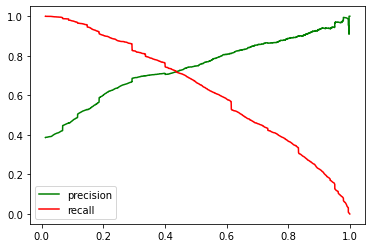

In [188]:
# Plotting the Precision Recall tradeoff curve

plt.plot(thresholds, p[:-1], "g-", label='precision')
plt.plot(thresholds, r[:-1], "r-", label='recall')
plt.legend()
plt.show()

#### The above plot also justifies choosing cutoff = 0.35 for Higher Recall as we can trade off some Precision for a higher recall. 

#### As per our use case, it won't be an issue if we make few calls to non potential leads. But we want to ensure that almost all the potential leads are contacted so that they can be converted.

In [189]:
# Updated the final_predicted with the predicted label as 0 if below 0.35 and 1 otherwise

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x >= 0.35 else 0)
y_train_pred_final.head()


,Converted,Converted_prob,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4715,0,0.116213,4715,1,1,0,0,0,0,0,0,0,0,0
7132,1,0.621323,7132,1,1,1,1,1,1,1,0,0,0,1
8954,0,0.583857,8954,1,1,1,1,1,1,0,0,0,0,1
5283,0,0.503695,5283,1,1,1,1,1,1,0,0,0,0,1
3003,0,0.260792,3003,1,1,1,0,0,0,0,0,0,0,0


In [190]:
# Let's check the overall accuracy.

train_acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
train_acc

0.7908163265306123

In [191]:
# confusion matrix for cutoff= 0.35

confusion_train = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion_train

array([[3153,  831],
       [ 522, 1962]])

In [192]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [193]:
print( 'Specificity : ' , TN / float(TN+FP))
print( 'Sensitivity : ' , TP / float(TP+FN))
print('False positive rate : ' , FP/ float(TN+FP))
print ('Positive predictive value : ' , TP / float(TP+FP))
print ('Negative predictive value : ' , TN / float(TN+ FN))

Specificity :  0.7914156626506024
Sensitivity :  0.7898550724637681
False positive rate :  0.2085843373493976
Positive predictive value :  0.7024704618689581
Negative predictive value :  0.8579591836734693


In [194]:
# Precision and Recall score for cutoff= 0.35

from sklearn.metrics import precision_score, recall_score

train_precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
train_recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

print('Precision : ', train_precision )
print('Recall : ', train_recall )

Precision :  0.7024704618689581
Recall :  0.7898550724637681


In [195]:
# our goal is to check that Target lead conversion rate is around 80%
# ie, Check how many are correctly predicted as Target leads(final predicted = 1) 
# among all the actual targets (Converted = 1)

target_leads = y_train_pred_final[y_train_pred_final['Converted'] == 1]
print('Target lead conversion rate: ', sum(target_leads['final_predicted'])/len(target_leads))

Target lead conversion rate:  0.7898550724637681


#### We are getting 79% conversion rate .This satisfies the CEO's demand of around 80% target leads conversion rate

## Predictions on Test data

In [196]:
# scaling the cols 

cols = ['TotalVisits', 'Time on Website' , 'Page Views Per Visit']
X_test[cols] = scaler.transform(X_test[cols])
X_test[cols]

,TotalVisits,Time on Website,Page Views Per Visit
4608,0.533333,0.110915,0.267
7935,0.133333,0.408891,0.200
4043,0.066667,0.000880,0.100
7821,0.133333,0.142165,0.200
856,0.200000,0.088468,0.300
...,...,...,...
4184,0.000000,0.000000,0.000
5023,0.266667,0.128081,0.400
6661,0.000000,0.000000,0.000
2201,0.333333,0.056778,0.250


In [197]:
# Selecting only those columns from X_test as in the X_train for final model

X_test = X_test[col]
X_test.head()

,TotalVisits,Time on Website,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Last Notable Activity_Others,Last Notable Activity_SMS Sent
4608,0.533333,0.110915,0,0,0,1,0,1,0,0,0
7935,0.133333,0.408891,0,0,1,0,0,0,0,0,0
4043,0.066667,0.000880,0,0,1,0,1,0,0,0,0
7821,0.133333,0.142165,0,0,0,1,0,0,1,0,0
856,0.200000,0.088468,0,0,0,1,0,0,0,0,0


In [198]:
# Predicting for test set

X_test_sm = sm.add_constant(X_test)
y_test_pred = res5.predict(X_test_sm)
y_test_pred[:10]

4608    0.232582
7935    0.026687
4043    0.016103
7821    0.741144
856     0.075793
927     0.165788
318     0.962811
1018    0.134655
8151    0.416827
1570    0.961321
dtype: float64

In [199]:
y_test_pred_final = pd.DataFrame(y_test)
y_test_pred_final['CustID'] = y_test_pred_final.index
y_test_pred_final['Converted_prob'] =  y_test_pred
y_test_pred_final

,Converted,CustID,Converted_prob
4608,1,4608,0.232582
7935,0,7935,0.026687
4043,0,4043,0.016103
7821,0,7821,0.741144
856,0,856,0.075793
...,...,...,...
4184,0,4184,0.185945
5023,0,5023,0.008975
6661,0,6661,0.186333
2201,0,2201,0.114175


In [200]:
# setting final_predicted based on cutoff probability = 0.35

y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

y_test_pred_final.head()

,Converted,CustID,Converted_prob,final_predicted
4608,1,4608,0.232582,0
7935,0,7935,0.026687,0
4043,0,4043,0.016103,0
7821,0,7821,0.741144,1
856,0,856,0.075793,0


In [201]:
# Let's check the overall accuracy on test set.

test_acc = metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)
test_acc

0.7976190476190477

In [202]:
# test set confusion matrix for cutoff= 0.35

confusion_test = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted)
confusion_test

array([[1344,  351],
       [ 210,  867]])

In [203]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

print( 'Specificity : ' , TN / float(TN+FP))
print( 'Sensitivity : ' , TP / float(TP+FN))
print('False positive rate : ' , FP/ float(TN+FP))
print ('Positive predictive value : ' , TP / float(TP+FP))
print ('Negative predictive value : ' , TN / float(TN+ FN))

Specificity :  0.7929203539823009
Sensitivity :  0.8050139275766016
False positive rate :  0.20707964601769913
Positive predictive value :  0.7118226600985221
Negative predictive value :  0.8648648648648649


In [204]:
test_precision = precision_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)
test_recall = recall_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)
print('Test set Precision : ', test_precision)
print('Test set Recall : ', test_recall)

Test set Precision :  0.7118226600985221
Test set Recall :  0.8050139275766016


In [205]:
# Target leads conversion rate in Test set

target_leads_test = y_test_pred_final[y_test_pred_final['Converted'] == 1]
print('Target lead conversion rate in Test set: ', sum(target_leads_test['final_predicted'])/len(target_leads_test))

Target lead conversion rate in Test set:  0.8050139275766016


## Summarizing performance

In [206]:
train_f1score = metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
test_f1score = metrics.f1_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)


In [207]:
# Analyzing Train vs Test performance in Accuracy, Precision, Recall, F1-score

metrics_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'f1-score'], index=['Train', 'Test'])
metrics_df.loc['Train',:] = [train_acc, train_precision, train_recall, train_f1score]
metrics_df.loc['Test', :] = [test_acc, test_precision, test_recall, test_f1score ]
metrics_df

,Accuracy,Precision,Recall,f1-score
Train,0.790816,0.70247,0.789855,0.743604
Test,0.797619,0.711823,0.805014,0.755556


In [208]:
# Finding the top features and their ranks: Features with higher absolute value of coef
# have more importance in the prediction

res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2856.5
Date:                Fri, 16 Jun 2023   Deviance:                       5713.0
Time:                        11:35:31   Pearson chi2:                 6.61e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -3.4948      0.117    -29.779      0.000      -3.725      -3.265
TotalVisits                                 0.2110      0.181      1.163      0.245      -0.145       0.567
Time on Website                             4.0452      0.157     25.817      0.000       3.738       4.352
Lead Source_Olark Chat                      0.8722      0.105      8.325      0.000       0.667       1.078
Lead Source_Reference                       3.3581      0.215     15.653      0.000       2.938       3.779
Last Activity_Email Bounced                -1.7839      0.316     -5.638      0.000      -2.404      -1.164
Last Activity_Email Opened                  0.5938      0.080      7.410      0.000       0.437       0.751
Current Occupation_Student                  1.1486      0.224      5.135      0.000       0.710       1.587
Current Occupation_Unemployed               1.1460      0.084     13.719      0.000       0.982       1.310
Current Occupation_Working Professional     3.3497      0.188     17.797      0.000       2.981       3.719
Last Notable Activity_Others                1.6558      0.262      6.322      0.000       1.142       2.169
Last Notable Activity_SMS Sent              1.9421      0.090     21.512      0.000       1.765       2.119
===========================================================================================================
"""

### Top Features in our model are:
- Time on Website
- Lead Source_Reference
- Current Occupation_Working Professional

<AxesSubplot:>

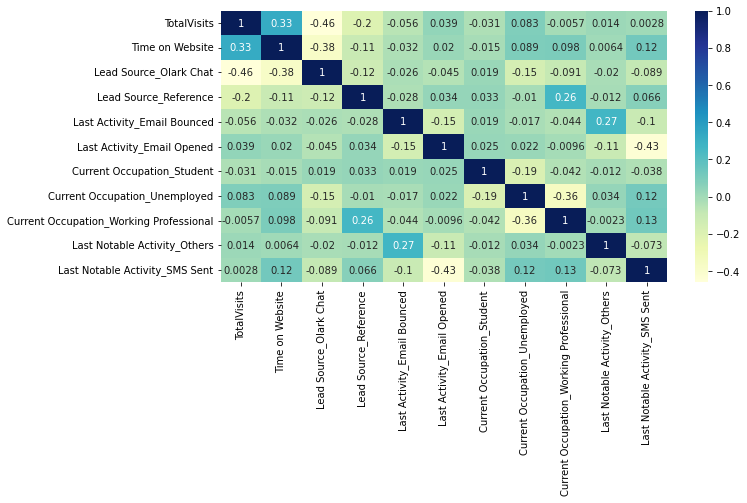

In [209]:
# Visualizing the correlation in the final model

plt.figure(figsize=[10,5])
sns.heatmap(X_train[col].corr(), annot = True,  cmap='YlGnBu')

There are no features that are highly correlated with each other. So, our model is simple and free from multicollinearity.